In [1]:
import numpy as np



## My Fractal!

Creating Plot....


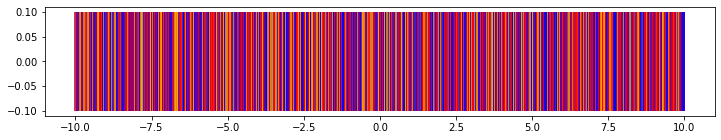

In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd

true_vals = [0,1,2,3]
colors = {0:'red',1:'orange',2:'blue',3:'purple'}

#red and orange will be used for minima, blue and purple for maxima

parray = np.arange(-10,10,0.01) #practice array
#print (parray)
#was printing it to test that the array was valid

soln = []

#for k, ii in enumerate(parray):
#    soln.append([parray[k],colors[random.randint(0,3)]]) ##testing one color at a time

#above was another way to do it
for ii in range(len(parray)):
    soln.append([parray[ii],colors[random.randint(0,3)]]) ##testing one color at a time

plt.rcParams['figure.figsize'] = [12, 2]
print('Creating Plot....')
for item in soln:
    plt.vlines([item[0]],-.1,.1,color=item[1])

### Commentary

Okay, this is cool but it isn't a fractal, I just gave numbers in a manually made array random colors. Worth noting the array should have a step of at most 0.01 as anything above that creates whitespace, but that will be more evident if colors were not randomized so even if that step is too high, I'll find out later. Now I have to:

- Use bisection method
- Set aside arrays based on changing mins and maxs (this was outlined in a past notebook)
- Print those array, NOT the root we find

0.8414709848078965 -0.09070257317431829
Number of iterations required:  28
Iteration count:    28
Root approximation: 1.9345632120966911
Error:              7.450580596923828e-09
Creating Plot....


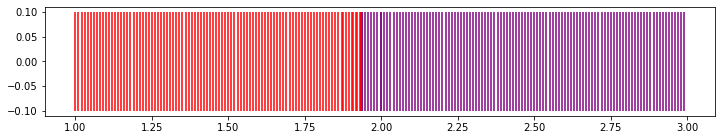

In [3]:
true_vals = [0,1,2,3]
colors = {0:'red',1:'orange',2:'blue',3:'purple'}

def f(x):
    return 1-x+np.sin(x) #this is eqn for problem 11 in bisection chapter
print(f(1), f(2))

a=1 #graphing it shows there is root between 1 and 3
b=3
mn=1 #these set height/range of graph
mx=2
ep=np.float_power(10, -8)

soln = [] # instigate empty array to fill later

x=np.arange(0,3,.01)  
#plt.plot(x, f(x), 'r')
#plt.ylim(-3,3)
#plt.axhline(0)
#plt.axvline(mn)  #dont wanna graph the original function, just the fractal.
#plt.axvline(mx)  #uncommenting all this here reveals our graph and how i pick max and min
#plt.show() 

#all above simply graphs our function

fa=f(a)
fb=f(b)

if fa==0:
        print("Error: a is a root")
if fb==0:
    print("Error: b is a root")
if fa*fb>0:
    print("Error: no root between a and b")
    
if fa*fb<0:
    n=np.log((b-a)/ep)/np.log(2)
    N=np.int(np.ceil(n))
    print("Number of iterations required: ", N)
    
# above section counts number of iterations for error, which I only do to prevent infinitely running code
    
for i in range(N):
    c=(a+b)/2
    err=b-c
    if err > ep:
        fc=f(c)
        if fc==0:
            print(c, "is a root of the function within")
            print(i+1)
            break
        elif np.sign(fc)*np.sign(fb)<0: #moves minimum up from a to c
            
            changingarray = np.arange(a,c,0.01) #array that i use to populate changes in soln
            for ii in range(len(changingarray)):
                soln.append([changingarray[ii],colors[0]]) ##everything to left of root should be red
            
            a=c
            fa=f(a)
        else: #moves maximum down from c to b
            
            changingarray = np.arange(c,b,0.01) #array that i use to populate changes in soln
            for ii in range(len(changingarray)):
                soln.append([changingarray[ii],colors[3]]) ##everything to the right of the root should be purple
            
            b=c
            fb=f(b)
    else:
        print("Iteration count:   ", i+1)
        print("Root approximation:", c)
        print("Error:             ", b-c)
        break
        
plt.rcParams['figure.figsize'] = [12, 2]
print('Creating Plot....')
for item in soln:
    plt.vlines([item[0]],-.1,.1,color=item[1])

### Commentary

Woah, I had a couple problems I was stuck on with the code, but I went on a walk and had an epiphany! I swapped my b and c in the else portion of bisection, because naturally b comes before c but not with the code, and now it is graphing properly. At this point, I have a new goal:

- Include two booleans that track if the minimum was just changed or the maximum was just changed
    - Implement it into the method

Iteration count:    28
Root approximation: 1.9345632120966911
Error:              7.450580596923828e-09

Orange represents the change in the minimum when the maximum was just changed, or the first time the minimum is changed.
Red represents the change in the minimum when the minimum was just changed, aka any consecutive times minimum changes.
Purple represents the change in the maximum when the minimum was just changed, or the first time the maximum is changed
Blue represents the change in the maximum when the maximum was just changed, aka any consecutive times maximum changes.

Creating Plot....


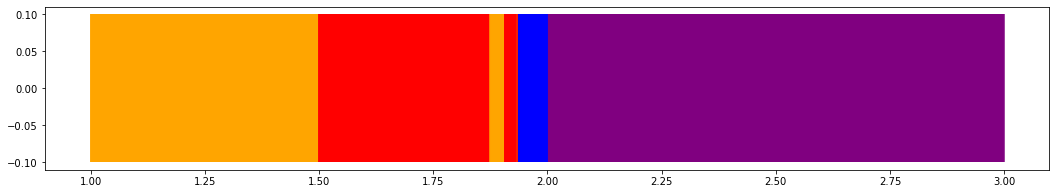

In [4]:
true_vals = [0,1,2,3]
colors = {0:'red',1:'orange',2:'blue',3:'purple'}

def f(x):
    return 1-x+np.sin(x) #this is eqn for problem 11 in bisection chapter
#print(f(1), f(3))

a=1 #graphing it shows there is root between 1 and 3
b=3
#mn=1 #these set height/range of graph
#mx=3
ep=np.float_power(10, -8)

soln = [] # instigate empty array to fill later

x=np.arange(0,3,.01)  
#plt.plot(x, f(x), 'r')
#plt.ylim(-3,3)
#plt.axhline(0)
#plt.axvline(mn)  #dont wanna graph the original function, just the fractal.
#plt.axvline(mx)  #uncommenting all this here reveals our graph and how i pick max and min
#plt.show() 

#all above simply graphs our function

fa=f(a)
fb=f(b)

if fa==0:
        print("Error: a is a root")
if fb==0:
    print("Error: b is a root")
if fa*fb>0:
    print("Error: no root between a and b")
    
if fa*fb<0:
    n=np.log((b-a)/ep)/np.log(2)
    N=np.int(np.ceil(n))
#    print("Number of iterations required: ", N)
    
# above section counts number of iterations for error, which I only do to prevent infinitely running code
    
###################### Having booleans that track if min or max was just changed #################
justMin = False
justMax = False
###################### Start as false because nothing was just changed at first iteration ########
    
    
for i in range(N):
    c=(a+b)/2
    err=b-c
    if err > ep:
        fc=f(c)
        if fc==0:
            print(c, "is a root of the function within")
            print(i+1)
            break
        elif np.sign(fc)*np.sign(fb)<0: #moves minimum up from a to c
            
            if justMin:            
                changingarray = np.arange(a,c,0.001) #array that i use to populate changes in soln
                for ii in range(len(changingarray)):
                    soln.append([changingarray[ii],colors[0]]) 
                    
            elif (justMax):            
                changingarray = np.arange(a,c,0.001) #array that i use to populate changes in soln
                for ii in range(len(changingarray)):
                    soln.append([changingarray[ii],colors[1]]) 
                    
            
            justMin = True
            justMax = False
            a=c
            fa=f(a)
        else: #moves maximum down from c to b
            
            if justMin:
                changingarray = np.arange(c,b,0.001) #array that i use to populate changes in soln
                for ii in range(len(changingarray)):
                    soln.append([changingarray[ii],colors[2]]) 
                    
            else:
                changingarray = np.arange(c,b,0.001) #array that i use to populate changes in soln
                for ii in range(len(changingarray)):
                    soln.append([changingarray[ii],colors[3]]) 
            
            justMax = True
            justMin = False
            b=c
            fb=f(b)
    else:
        print("Iteration count:   ", i+1)
        print("Root approximation:", c)
        print("Error:             ", b-c)
        break
        
plt.rcParams['figure.figsize'] = [18, 3]
print('\nOrange represents the change in the minimum when the maximum was just changed, or the first time the minimum is changed.')
print('Red represents the change in the minimum when the minimum was just changed, aka any consecutive times minimum changes.')
print('Purple represents the change in the maximum when the minimum was just changed, or the first time the maximum is changed')
print('Blue represents the change in the maximum when the maximum was just changed, aka any consecutive times maximum changes.')
print('\nCreating Plot....')

for item in soln:
    plt.vlines([item[0]],-.1,.1,color=item[1])

### Conclusion

My fractal is alive! After weeks of numerical applications I have finalized my fractal. It is certainly interesting, as the large purple implies that the maximum was lowered multiple times in a row most of the time, as it only altered the maximum after the minimum was altered once. I am sure that zooming in and iterating more would reveal more purple near the root. My only plans from here on out are to test it on other equations and clean it up with comments.